# Simulating 1D dynamical systems 


## Table of Contents 

* Defining equations of motion
* Rendering phase portrait
* Numerical calculation of solutions 
    * Euler's method
    * Midpoint method aka Rundge Kutta order 2 (RK2)

## Setup

In [60]:
import numpy as np
from scipy.optimize import fsolve
from scipy.misc import derivative
import matplotlib as mpl
import matplotlib.pyplot as plt

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Defining variable and equations of motion

In [101]:
X_LABEL = "Voltage"

def dXdT(x):
    return(np.sin(x))

## Rendering the phase portrait

In [168]:
X_MIN = -5
X_MAX = 5

# function to find critical points
def find_1D_critical_points(dXdT,  xlim=(X_MIN, X_MAX), res_c=0.001, epsilon=0.0001):
    x_min, x_max = xlim
    
    # Define starting positions
    X_0s = np.arange(x_min, x_max, res_c)
    critical_points = []
    # Loop over possible starting positions
    for X_0 in X_0s:
        # Find critical point from starting position
        X_c = fsolve(dXdT, X_0, factor=0.1)[0]
        
        # Checking if its in range
        if (X_c >= x_min) & (X_c <= x_max):
            if len(critical_points) > 0:
                # Check to make sure the point is not already included
                is_included = np.any(np.abs(np.array(critical_points) - X_c) < epsilon)
                if not is_included:
                    critical_points.append(X_c)
            else:
                # first point
                critical_points.append(X_c)
    critical_points = np.array(critical_points)
    
    # Checking which ones actually worked
    
    actually_worked = np.isclose(dXdT(critical_points), np.zeros(len(critical_points)))
    critical_points = critical_points[actually_worked]
    critical_points 
    
    return(critical_points)

# function to find sign of function at points
def find_sign_of_derivative(func, Xs):
    return(np.sign([derivative(func, X) for X in Xs]))

# function to plot the phase portrait
def plot_1D_phase_space(dXdT, xlim=(X_MIN, X_MAX), x_label=X_LABEL, res_c=0.001, epsilon=0.0001, ax=None):
    if ax == None:
        fig, ax = plt.subplots()
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    ax.set_xlabel(x_label, loc="right")
    ax.set_ylabel(f"d({x_label})/dT", loc="top")
    
    # Plotting derivative
    X = np.arange(xlim[0], xlim[1], res_c)
    ax.plot(X, dXdT(X), color='blue')
    
    # Finding critical points
    X_c = find_1D_critical_points(dXdT,  xlim=xlim, res_c=res_c, epsilon=epsilon)
    
    # Finding stability
    X_c_sign = find_sign_of_derivative(dXdT, X_c)
    facecolors = ["blue" if sign < 0 else "white" for sign in X_c_sign]
    
    # Plotting critical points
    ax.scatter(X_c, np.zeros(len(X_c)), s=100, color='blue', marker='o', facecolor=facecolors)
    ax.set_xlim(xlim)

In [169]:
X_c = find_1D_critical_points(dXdT)
print(X_c)

[-3.14159265  0.          3.14159265]


In [170]:
find_sign_of_derivative(dXdT, X_c)

array([-1.,  1., -1.])

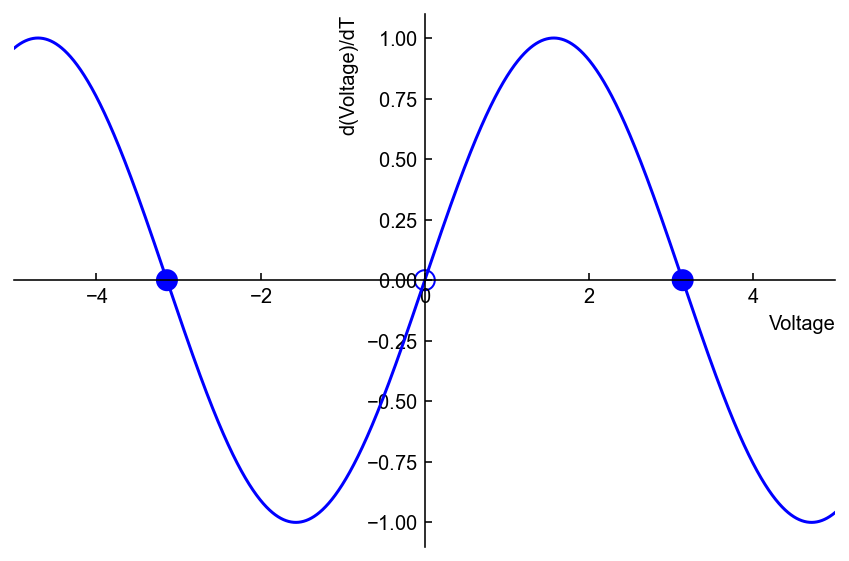

In [171]:
plot_1D_phase_space(dXdT)

## Plotting solutions 

## Euler's method

In [183]:
# Functions implimenting Euler's method
def find_next_point_Euler(x, dxdt, dt=0.001):
    x_next = x + dxdt(x)*dt
    return(x_next)

def simulate(x_0, t_f, dxdt, simulation_function, dt=0.001):
    X_solution = [x_0]
    T = np.arange(dt, t_f, dt)
    for t in T[1:]:
        x_previous = X_solution[-1]
        x_next = simulation_function(x_previous, dxdt, dt=dt)
        X_solution.append(x_next)
    return (T, X_solution)

def simulate_collection(X_0s, t_f, dxdt, simulation_function, dt=0.001):
    X = []
    for X_0, in X_0s:
        T, X_sol = simulate(X_0, t_f, dxdt, simulation_function, dt=dt)
        X.append(X_sol)
    return T, X

# Function to plot phase space diagram w/ critical points 
from itertools import product

def plot_solutions(T_f, X_0s, dxdt, simulation_functions, colors=['k'], dt=DT, xlim=(X_MIN, X_MAX), x_label=X_LABEL):
    fig, (ax, ax_t) = plt.subplots(ncols=2, figsize=(9, 4))
    plot_1D_phase_space(dxdt, xlim=xlim, x_label=x_label, ax=ax)
    
    X_solutions = []
    for simulation_function, X_0 in product(simulation_functions, X_0s):
        T, X_solution = simulate(X_0, T_f, dxdt, simulation_function, dt=dt)
        X_solutions.append(X_solution)

    if len(colors) != len(X_solutions):
        colors = len(X_solutions) * colors

    for X_solution, color in zip(X_solutions, colors):
        ax_t.set_title("{0} vs. time".format(x_label))
        ax_t.spines['bottom'].set_position(('data',0))
        ax_t.plot(T, X_solution, color=color)
        ax_t.scatter(T[0], X_solution[0], color=color, zorder=10, s=10.0)
        ax_t.set_ylabel(x_label)
        ax_t.set_xlabel("Time", loc="right")
        ax_t.set_ylim(xlim)

### Simulating Euler's method

In [173]:
X_0 = 0.5 # starting x
T_f = 20 # final time (starting time is always T=0)

DT = 0.0001 # Simulation timestep, smaller is more accurate

In [174]:
# Simulating system starting at X_0, Y_0 from time=0 to T_f using Euler's method
T, X_euler = simulate(X_0, T_f, dXdT, find_next_point_Euler, dt=DT)

In [175]:
# First 10 timesteps
T[:10]

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])

In [176]:
# First 10 X values calculated by Euler's method 
X_euler[:10]

[0.5,
 0.5000479425538604,
 0.5000958893150207,
 0.5001438402837398,
 0.5001917954602767,
 0.5002397548448904,
 0.5002877184378397,
 0.5003356862393837,
 0.5003836582497814,
 0.5004316344692915]

### Graphing the Euler's method simulation

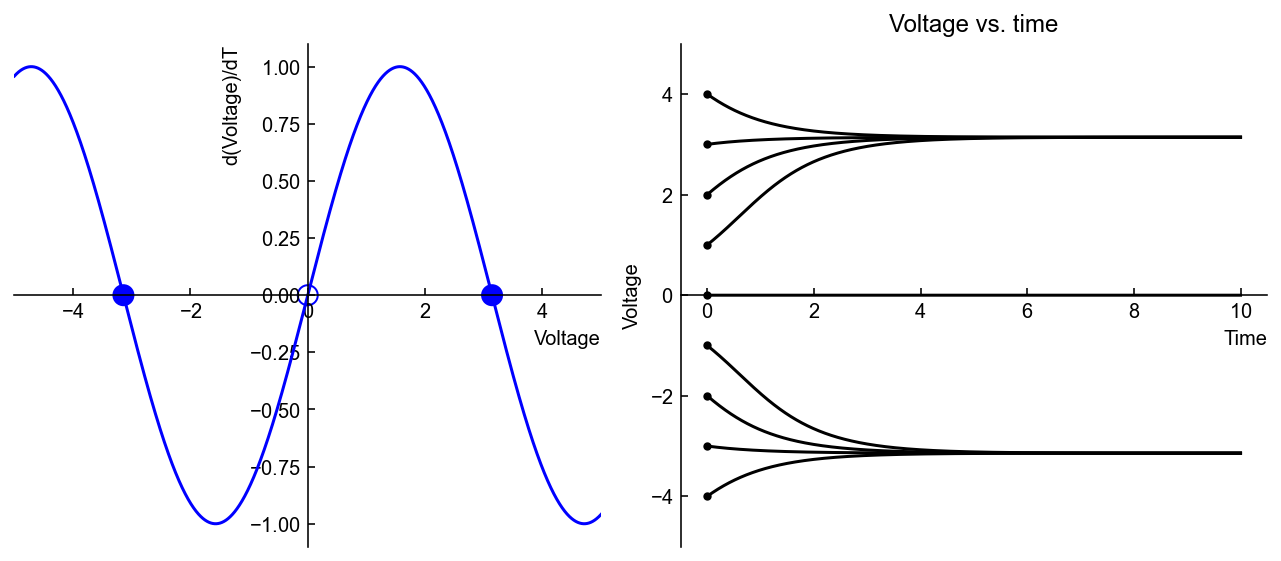

In [185]:
plot_solutions(10, [-4, -3, -2, -1, 0, 1, 2, 3, 4], dXdT, [find_next_point_Euler])

## Midpoint method aka Rundge Kutta order 2 (RK2)

In [188]:
# Function implimenting the midpoint method aka RK2
def find_next_point_midpoint(x, dxdt, dt=DT):
    x_test = x + dxdt(x)*dt
    x_next = x + dxdt((x + x_test)/2.)*dt
    return(x_next)

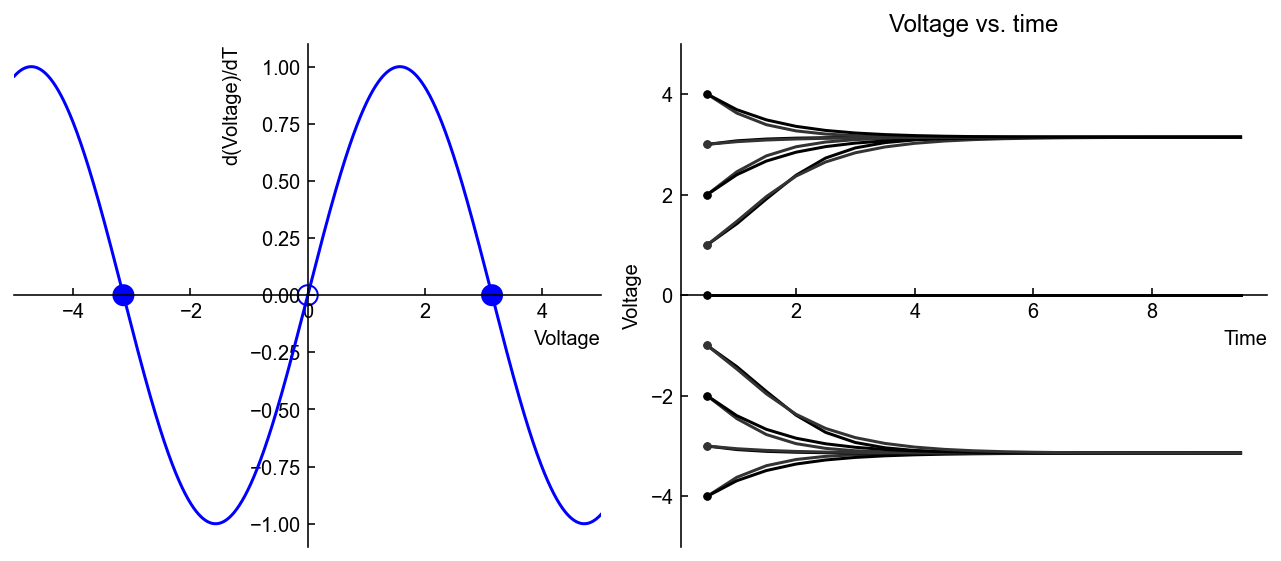

In [195]:
plot_solutions(10, [-4, -3, -2, -1, 0, 1, 2, 3, 4], dXdT, [find_next_point_Euler, find_next_point_midpoint], colors=['.2', 'k'], dt=.5)